In [10]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3
!pip install seaborn==0.13.2


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

## About the dataset
The data set being used for this lab is the "Obesity Risk Prediction" data set publically available on <a href="https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition">UCI Library</a> under the <a href="https://creativecommons.org/licenses/by/4.0/legalcode">CCA 4.0</a> license. The data set has 17 attributes in total along with 2,111 samples. 

The attributes of the dataset are descibed below.


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-7zrl">Variable Name</th>
    <th class="tg-7zrl">Type</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">Gender</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Age</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Height</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Weight</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">family_history_with_overweight</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Has a family member suffered or suffers from overweight?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FAVC</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you eat high caloric food frequently?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FCVC</td>
    <td class="tg-7zrl">Integer</td>
    <td class="tg-7zrl">Do you usually eat vegetables in your meals?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">NCP</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How many main meals do you have daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CAEC</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Do you eat any food between meals?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">SMOKE</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you smoke?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CH2O</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How much water do you drink daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">SCC</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you monitor the calories you eat daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FAF</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How often do you have physical activity?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">TUE</td>
    <td class="tg-7zrl">Integer</td>
    <td class="tg-7zrl">How much time do you use technological devices such as cell phone, videogames, television, computer and others?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CALC</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">How often do you drink alcohol?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">MTRANS</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Which transportation do you usually use?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">NObeyesdad</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Obesity level</td>
  </tr>
</tbody></table>


In [12]:
# 1. Load the dataset
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [14]:
# 2. Preprocess the data
# Separate features and target
target = 'NObeyesdad'
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove(target)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Encode the target
target_le = LabelEncoder()
df[target] = target_le.fit_transform(df[target])

# Encode categorical features
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le
    
# Scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [19]:
# 3. Split into X and y
X = df.drop(columns=[target])
y = df[target]

In [20]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [40]:
# 5. Train Logistic Regression (Softmax)
# Note: LogisticRegression with multi_class='multinomial' is equivalent to Softmax regression
model = OneVsOneClassifier(LogisticRegression(solver='lbfgs', max_iter=1000))
model.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

In [41]:
# 6. Predict and Evaluate
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred, target_names=target_le.classes_))

✅ Accuracy: 0.9361702127659575

📋 Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      1.00      0.96        54
      Normal_Weight       0.90      0.81      0.85        58
     Obesity_Type_I       0.99      0.94      0.96        70
    Obesity_Type_II       0.97      1.00      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.81      0.90      0.85        58
Overweight_Level_II       0.95      0.91      0.93        58

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.93       423
       weighted avg       0.94      0.94      0.94       423



C:\Users\SH\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


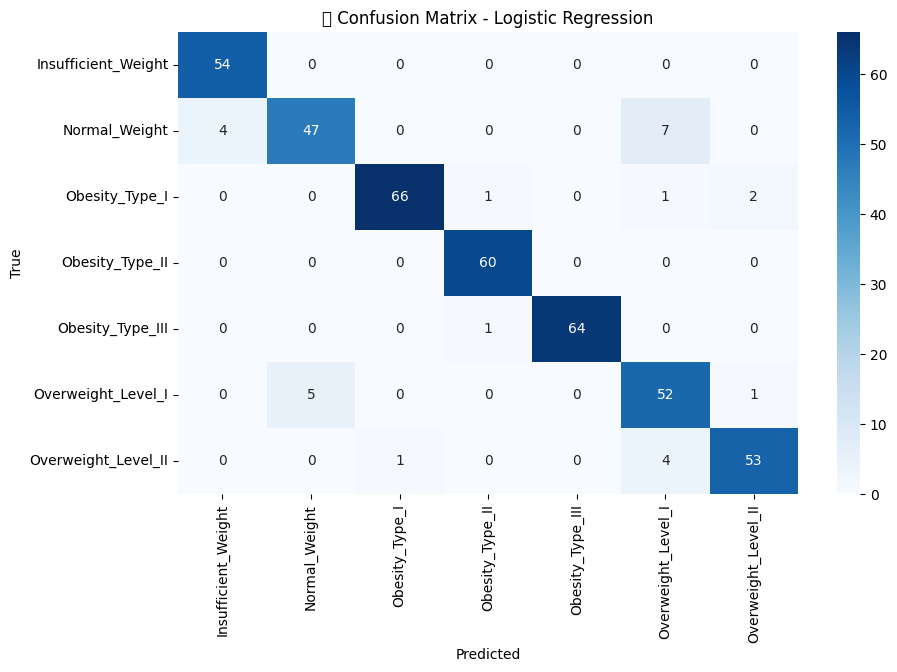

In [42]:
# 7. Visualization(Confusion Matrix)
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=target_le.classes_,
            yticklabels=target_le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('🔍 Confusion Matrix - Logistic Regression')
plt.show()

In [43]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multiclass import OneVsOneClassifier

# One-vs-Rest
ovr_model = LogisticRegression(multi_class='ovr', max_iter=1000)
ovr_model.fit(X_train, y_train)
y_pred_ovr = ovr_model.predict(X_test)

# Multinomial
multi_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
multi_model.fit(X_train, y_train)
y_pred_multi = multi_model.predict(X_test)

# One-vs-One
ovo_model = OneVsOneClassifier(LogisticRegression(solver='lbfgs', max_iter=1000))
ovo_model.fit(X_train, y_train)
y_pred_ovo = ovo_model.predict(X_test)

# Print accuracies
print("OvR Accuracy:       ", accuracy_score(y_test, y_pred_ovr))
print("Multinomial Accuracy:", accuracy_score(y_test, y_pred_multi))
print("OvO Accuracy:       ", accuracy_score(y_test, y_pred_ovo))



c:\Users\SH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\SH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


OvR Accuracy:        0.7635933806146572
Multinomial Accuracy: 0.8723404255319149
OvO Accuracy:        0.9361702127659575
